Data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

In [3]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Deleted columns which had most values missing PolicCars	PolicOperBudg	LemasPctPolicOnPatr	 LemasGangUnitDeploy	
PolicBudgPerPop	LemasSwornFT LemasSwFTPerPop LemasSwFTFieldOps LemasSwFTFieldPerPop	LemasTotalReq LemasTotReqPerPop	 
PolicReqPerOffic PolicPerPop RacialMatchCommPol	PctPolicWhite PctPolicBlack	PctPolicHisp PctPolicAsian	PctPolicMinorOfficAssgnDrugUnits NumKindsDrugsSeiz	PolicAveOTWorked & non predictive county, community , communityname

In [4]:
df = pd.DataFrame.from_csv('crimen.csv', index_col=None,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,8,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


Drop non predictive State

In [5]:
df=df.drop(df[[0]],1)


In [6]:
dfc=df.corr()

keep features with at least 5% correlation

In [7]:
dfc1=pd.DataFrame(dfc[98])
dfc1['corr']=dfc1[98]
dfc1=dfc1[abs(dfc1['corr'])>=0.05]


In [8]:
lbl = pd.DataFrame.from_csv("Book1.csv", index_col=None,header=0)
lbl['corr']=dfc1['corr']
lbl=pd.merge(lbl,dfc1,left_index='True',right_index='True')
lbl=lbl[['name','corr_x']]
chkcorr=lbl.sort('corr_x')
print 'most correlated' 
chkcorr.head(5), chkcorr.tail(5)


most correlated


(                 name    corr_x
 43        PctKids2Par -0.738424
 42         PctFam2Par -0.706667
 4        racePctWhite -0.684770
 44   PctYoungKids2Par -0.666059
 45        PctTeen2Par -0.661582,                     name    corr_x
 39          FemalePctDiv  0.556032
 17           pctWPubAsst  0.574665
 3           racepctblack  0.631264
 48              PctIlleg  0.737957
 98   ViolentCrimesPerPop  1.000000)

In [9]:
lbl

,name,corr_x
1,population,0.367157
3,racepctblack,0.631264
4,racePctWhite,-0.684770
6,racePctHisp,0.293050
7,agePct12t21,0.060477
8,agePct12t29,0.153357
9,agePct16t24,0.099347
10,agePct65up,0.067171
11,pctUrban,0.082025
12,medIncome,-0.424221


In [10]:
from sklearn.ensemble import RandomForestRegressor
dfa=np.array(df)
target = np.array([x[-1] for x in dfa])
features = np.array([x[:-1] for x in dfa])

cfr = RandomForestRegressor(n_estimators=100, random_state=40)
cfr.fit(features, target)
importances = cfr.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature no.{} ({})".format(i+1,indices[i],importances[indices[i]])

Feature Ranking: 
1 feature no.47 (0.396200119816)
2 feature no.42 (0.138395145931)
3 feature no.41 (0.0372030752276)
4 feature no.3 (0.033049035433)
5 feature no.68 (0.0155039557881)
6 feature no.65 (0.0125609019748)
7 feature no.87 (0.0119404265263)
8 feature no.23 (0.00955123144928)
9 feature no.38 (0.00909026437313)
10 feature no.14 (0.00870793770462)


In [11]:
dfa=np.array(df)
target = np.array([x[-1] for x in dfa])
features = np.array([x[:-1] for x in dfa])
import statsmodels.api as sm
features = sm.add_constant(features)
est = sm.OLS(target, features).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     44.41
Date:                Fri, 02 Oct 2015   Prob (F-statistic):               0.00
Time:                        16:08:21   Log-Likelihood:                 1257.7
No. Observations:                1994   AIC:                            -2319.
Df Residuals:                    1896   BIC:                            -1771.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5466      0.202      2.704      0.007         0.150     0.943
x1            -0.1138      0.098     -1.160      0.246        -0.306     0.079
x2            -0.0267      0.086     -0.309      0.757        -0.196     0.143
x3             0.2001      0.051      3.926      0.000         0.100     0.300
x4            -0.0517      0.059     -0.883      0.378        -0.167     0.063
x5            -0.0136      0.034     -0.396      0.692        -0.081     0.054
x6             0.0610      0.053      1.143      0.253        -0.044     0.166
x7             0.1055      0.106      0.997      0.319        -0.102     0.313
x8            -0.2354      0.156     -1.507      0.132        -0.542     0.071
x9            -0.1229      0.164     -0.751      0.453        -0.444     0.198
x10            0.0456      0.103      0.440      0.660        -0.157     0.249
x11            0.0391      0.010      3.996      0.000         0.020     0.058
x12           -0.1947      0.173     -1.127      0.260        -0.533     0.144
x13           -0.1895      0.089     -2.131      0.033        -0.364    -0.015
x14            0.0460      0.020      2.291      0.022         0.007     0.085
x15           -0.1761      0.068     -2.606      0.009        -0.309    -0.044
x16            0.0869      0.107      0.813      0.416        -0.123     0.297
x17            0.0081      0.046      0.175      0.861        -0.082     0.098
x18           -0.0871      0.037     -2.367      0.018        -0.159    -0.015
x19            0.2836      0.160      1.770      0.077        -0.031     0.598
x20            0.1265      0.188      0.674      0.500        -0.241     0.494
x21           -0.3768      0.151     -2.495      0.013        -0.673    -0.081
x22           -0.0301      0.025     -1.184      0.237        -0.080     0.020
x23           -0.0355      0.019     -1.829      0.068        -0.074     0.003
x24            0.0220      0.019      1.160      0.246        -0.015     0.059
x25            0.0465      0.019      2.486      0.013         0.010     0.083
x26            0.0311      0.025      1.252      0.211        -0.018     0.080
x27           -0.1637      0.060     -2.714      0.007        -0.282    -0.045
x28           -0.1014      0.068     -1.498      0.134        -0.234     0.031
x29            0.0507      0.096      0.531      0.596        -0.137     0.238
x30            0.0611      0.077      0.790      0.430        -0.091     0.213
x31            0.0012      0.041      0.028      0.977        -0.079     0.081
x32            0.2466      0.079      3.125      0.002         0.092     0.401
x33           -0.0654      0.032     -2.041      0.041        -0.128    -0.003
x34           -0.0212      0.041     -0.519      0.604        -0.101     0.059
x35            0.0733      0.055      1.335      0.182        -0.034     0.181
x3

Scatter plots for features(high correlation or high importance) showing significant relationships

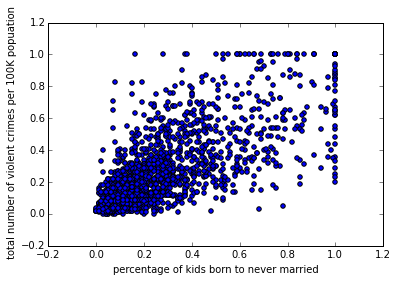

In [473]:
plt.scatter(df[48],df[98])
plt.xlabel('percentage of kids born to never married')
plt.ylabel(' total number of violent crimes per 100K popuation')

Shows a positive correlation and is also statistically significant

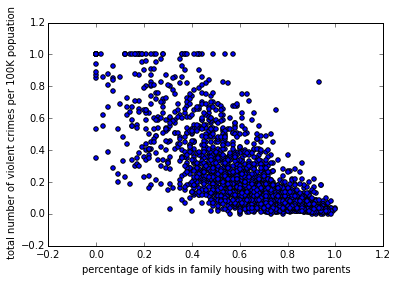

In [474]:
plt.scatter(df[43],df[98])
plt.xlabel('percentage of kids in family housing with two parents')
plt.ylabel(' total number of violent crimes per 100K popuation')

Shows a negative correlation and is also statistically significant

In [12]:
c=df.drop(df.index[375])
#outlier

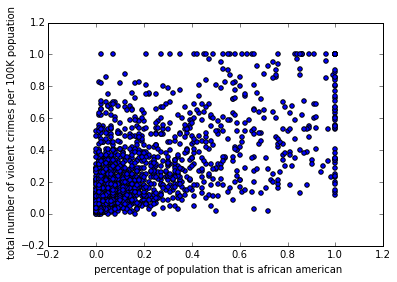

In [476]:
plt.scatter(df[3],df[98])
plt.xlabel(' percentage of population that is african american')
plt.ylabel(' total number of violent crimes per 100K popuation')

Shows a positive correlation and is also statistically significant

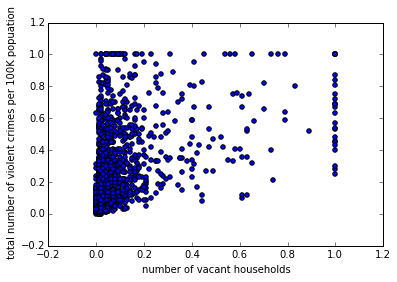

In [477]:
plt.scatter(df[69],df[98])
plt.xlabel('number of vacant households')
plt.ylabel(' total number of violent crimes per 100K popuation')

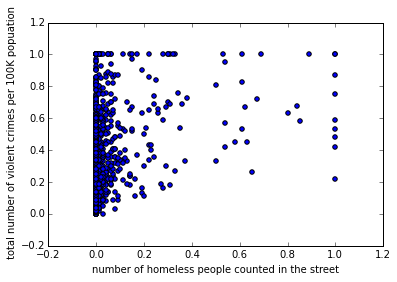

In [478]:
plt.scatter(df[88],df[98])
plt.xlabel('number of homeless people counted in the street')
plt.ylabel(' total number of violent crimes per 100K popuation')

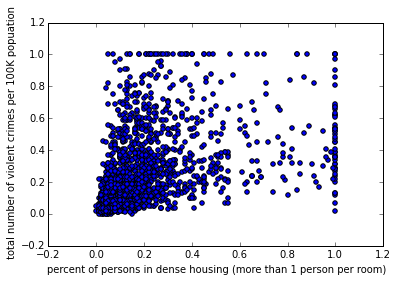

In [484]:
plt.scatter(df[66],df[98])
plt.xlabel('percent of persons in dense housing (more than 1 person per room) ')
plt.ylabel(' total number of violent crimes per 100K popuation')

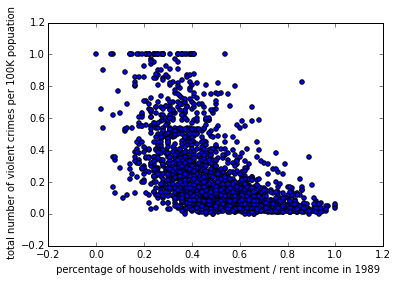

In [480]:
plt.scatter(df[15],df[98])
plt.xlabel(' percentage of households with investment / rent income in 1989 ')
plt.ylabel(' total number of violent crimes per 100K popuation')

In [485]:
ch=df[(df[15]>0.8) & (df[98]>0.8)]
ch[15]

375    0.86
Name: 15, dtype: float64

In [14]:
dft=pd.DataFrame(df.T)
dfm=pd.merge(lbl,dft,left_index='True',right_index='True')
dfm=dfm.drop('corr_x',1)
dfm=pd.DataFrame(dfm.T)


Applying Linear Regression

In [36]:
dfma=np.array(dfm)
dfma1=np.delete(dfma,(0),axis=0)
target = np.array([x[-1] for x in dfma1])
features = np.array([x[:-1] for x in dfma1])
from sklearn import linear_model
from sklearn.cross_validation import KFold,cross_val_score,cross_val_predict
clf = linear_model.LinearRegression()
scores = cross_val_score(clf, features, target, cv=10, scoring='r2')
np.mean(scores)


0.65362883122177284

Applying Recursive Feature selection

In [37]:
from sklearn.feature_selection import RFE
selector = RFE(clf,50, step=1)
selector = selector.fit_transform(features, target)

In [38]:
scores = cross_val_score(clf, selector, target, cv=10, scoring='r2')
np.mean(scores)

0.66164835907575248

After removing outlier

In [39]:
ca=np.array(c)
target = np.array([x[-1] for x in ca])
features = np.array([x[:-1] for x in ca])
selector = RFE(clf,65, step=1)
selector = selector.fit_transform(features, target)
scores = cross_val_score(clf, selector, target, cv=10, scoring='r2')
np.mean(scores)

0.66574472602754331

Applying Ridge Regression

In [40]:
clf = linear_model.Ridge(alpha = .5)
selector = RFE(clf,65, step=1)
selector = selector.fit_transform(features, target)
scores = cross_val_score(clf, selector, target, cv=10, scoring='r2')
np.mean(scores)

0.66959908571796567

Checking with RandomRegressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
crf=RandomForestRegressor()
scores = cross_val_score(crf, features, target, cv=10, scoring='r2')
np.mean(scores)


0.62587083733061355

prediction errors Using Ridge regression and RFE


C:\Users\Praful\Anaconda\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


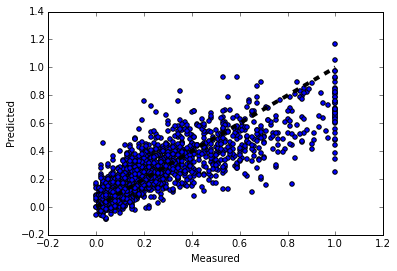

In [42]:
predicted = cross_val_predict(clf, selector, target, cv=10)

fig,ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()
print 'prediction errors Using Ridge regression and RFE'

Boxcox Transformation

In [44]:
from scipy import stats

y=stats.boxcox(target+1,0)
y

array([ 0.18232156,  0.51282363,  0.35767444, ...,  0.20701417,
        0.17395331,  0.39204209])

In [45]:
clf = linear_model.LinearRegression()
scores = cross_val_score(clf, features, y, cv=10, scoring='r2')
np.mean(scores)


0.67873601930539051

In [54]:
selector = RFE(clf,60, step=1)
selector = selector.fit_transform(features, y)
scores = cross_val_score(clf, selector, y, cv=10, scoring='r2')
np.mean(scores)

0.6889399310690415

In [64]:
clf = linear_model.Ridge(alpha = .5)
selector = RFE(clf,65, step=1)
selector = selector.fit_transform(features, y)
scores = cross_val_score(clf, selector, y, cv=10, scoring='r2')
np.mean(scores)

0.68996551682605267

prediction errors Using Ridge regression and RFE


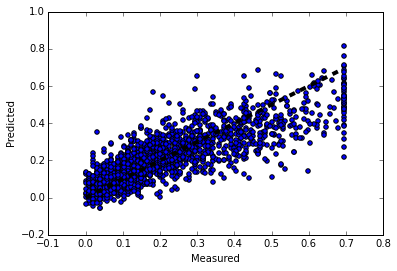

In [65]:
predicted = cross_val_predict(clf, selector, y, cv=10)

fig,ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()
print 'prediction errors Using Ridge regression and RFE'